# Random Forest com Iris

In [1]:
# Importando dataset
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
# Nome dos valores target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
# Nomes dos atributos
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Criando dataframe
import pandas as pd
dataset = pd.DataFrame({'sepal_length': iris.data[:,0],
                        'sepal_width': iris.data[:,1],
                        'petal_length': iris.data[:,2],
                        'petal_width': iris.data[:,3],
                        'target': iris.target})

In [5]:
# Head
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
dataset.shape

(150, 5)

### Separando o dataset em dados de treino e teste

In [7]:
from sklearn.model_selection import train_test_split
X = dataset[['sepal_length','sepal_width','petal_length','petal_width']]
Y = dataset['target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

### Criando modelo e fazendo previsão

In [9]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
predicts = random_forest.predict(x_test)

### Metricas

In [12]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,predicts))

Accuracy:  1.0


In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Usando Random Forest para achar as features importantes

In [15]:
random_forest_features = RandomForestClassifier(n_estimators=100)
random_forest_features.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
features_imp = pd.Series(random_forest_features.feature_importances_, index = iris.feature_names)

In [17]:
features_imp

sepal length (cm)    0.093460
sepal width (cm)     0.036122
petal length (cm)    0.402830
petal width (cm)     0.467588
dtype: float64

### Plotando

No handles with labels found to put in legend.


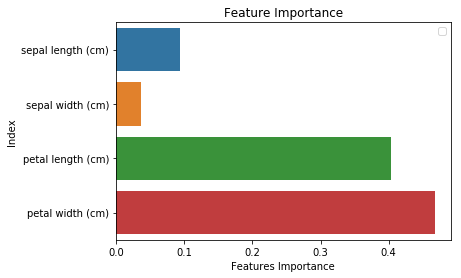

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Criando barplot
sns.barplot(x=features_imp, y = features_imp.index)
plt.xlabel("Features Importance")
plt.ylabel("Index")
plt.title("Feature Importance")
plt.legend()
plt.show()

### Gerar modelos com as 3 melhores features 

In [19]:
x1 = dataset[['sepal_length','petal_length','petal_width']]
y1 = dataset['target']

In [20]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.5, random_state=42)

### Criando, compilando e fit no modelo

In [21]:
random_forest_2 = RandomForestClassifier(n_estimators=100)
random_forest_2.fit(x_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
predicts_2 = random_forest_2.predict(x_test1)

In [23]:
print("Accuracy: ", metrics.accuracy_score(y_test1, predicts_2))

Accuracy:  0.9733333333333334


In [24]:
print(classification_report(y_test1, predicts_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.92      1.00      0.96        23
           2       1.00      0.91      0.95        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

